<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products with sell more. 

## Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:
import pandas as pd

In [2]:
past = pd.read_csv('../dat/past.csv.gz')

In [3]:
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?
   Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
   From the classification perspective, is the data balanced?

In [4]:
# get the percentage of interactions with a purchase
past['Purchased?'].mean() * 100

34.38

In [5]:
# get the distribution of interactions with and without a purchase
past['Purchased?'].value_counts() / len(past) * 100

0    65.62
1    34.38
Name: Purchased?, dtype: float64

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [6]:
X = past.drop(labels=['product_id', 'user_id', 'Purchased?'], axis=1)
y = past['Purchased?']

In [7]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to an numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
pca = PCA(n_components=5)

# scale the data first
X_scaled = scaler.fit_transform(X)

# run PCA
pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)

In [10]:
X_reduced

array([[ 0.57423116, -1.67641127,  1.08259039, -0.03270164,  0.89053341],
       [ 0.44586135,  0.00658692, -0.59269399,  0.1866328 ,  0.34406844],
       [-0.15719236, -1.1467779 , -0.46611644, -0.33684857, -1.19413869],
       ...,
       [ 2.11462374, -2.38209268, -0.99946284, -0.63580275,  0.25831708],
       [ 2.46339579, -1.94476464, -1.02389438,  0.36589965,  1.82297504],
       [-2.43415609,  0.34676994,  0.06336201, -0.39126338,  0.66213826]])

In [11]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [12]:
pca.explained_variance_ratio_

array([0.10281897, 0.09444818, 0.06516675, 0.05143463, 0.04262678])

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [13]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [14]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

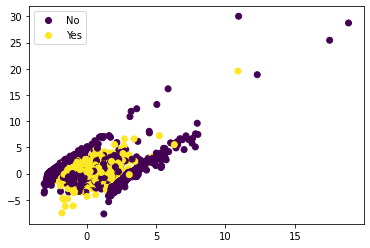

In [15]:
visualize_2pcs(X_reduced, y=y)

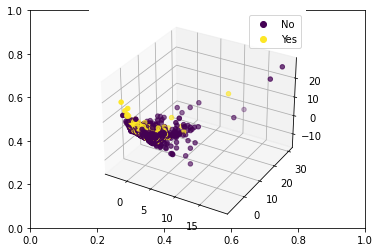

In [16]:
visualize_3pcs(X_reduced, y=y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( do you consider data is balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def train(X, y, standardize = True) -> None:
    # do the split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # conditional scaling
    if standardize:
        print('Fitting pipe with scaling')
        pipe = Pipeline(
            steps=[
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression(class_weight='balanced', random_state=0))
        ])
    else:
        print('Skipping scaling')
        pipe = Pipeline(
            steps=[('classifier', LogisticRegression(class_weight='balanced', random_state=0))])
    # fit, predict, and print report
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))


Now apply the pipeline on the all the features `X` and review the performance

In [18]:
# full feature-space without standardization
train(X, y, standardize=False)

Skipping scaling
              precision    recall  f1-score   support

           0       0.98      0.40      0.57       649
           1       0.47      0.99      0.64       351

    accuracy                           0.61      1000
   macro avg       0.73      0.70      0.61      1000
weighted avg       0.81      0.61      0.60      1000



In [19]:
# full feature-space with standardization
train(X, y, standardize=True)

Fitting pipe with scaling
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [20]:
# dimensionality-reduced features-space without standarization
train(X_reduced, y, standardize=False)

Skipping scaling
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       649
           1       0.50      0.54      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.63      0.62      1000
weighted avg       0.66      0.65      0.65      1000



In [21]:
# dimensionality-reduced features-space with standarization
train(X_reduced, y, standardize=True)

Fitting pipe with scaling
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       649
           1       0.50      0.54      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.63      0.62      1000
weighted avg       0.66      0.65      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [22]:
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [23]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots(figsize=(16, 6))
    inertias = []
    k_array = []
    for k in range(1, ks):
        kmeans =  KMeans(n_clusters=k, random_state=10)
        kmeans.fit(X)
        k_array.append(k)
        inertias.append(kmeans.inertia_)
    plt.plot(k_array, inertias)
    plt.xticks(k_array)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

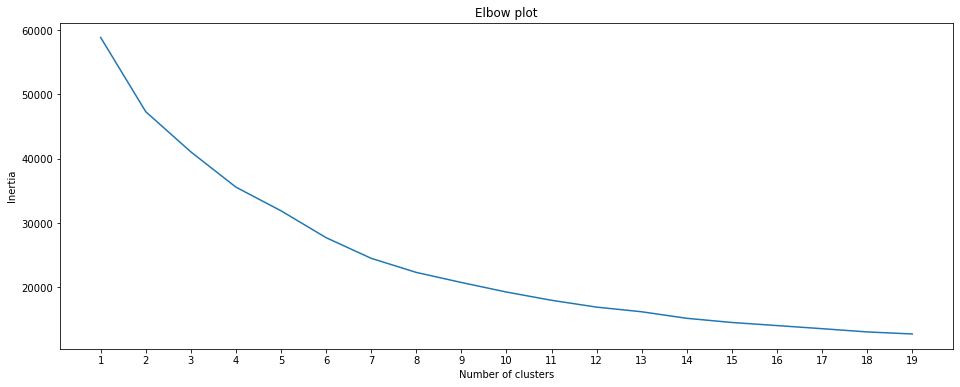

In [24]:
visualize_elbow(X_reduced, 20)

4. What are the disadvantages to using the Elbow method? 

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [25]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.25333964195365927
For n_clusters = 3 The average silhouette_score is : 0.26179993031612175
For n_clusters = 4 The average silhouette_score is : 0.27572439757692524
For n_clusters = 5 The average silhouette_score is : 0.242843056250863
For n_clusters = 6 The average silhouette_score is : 0.24695708296349544
For n_clusters = 7 The average silhouette_score is : 0.2526581784747361
For n_clusters = 8 The average silhouette_score is : 0.2645760353132879
For n_clusters = 9 The average silhouette_score is : 0.25914185006564755


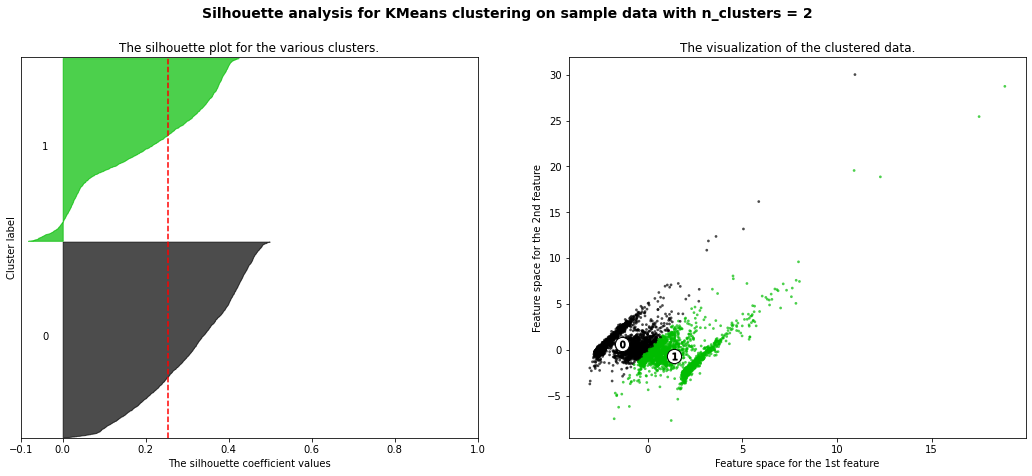

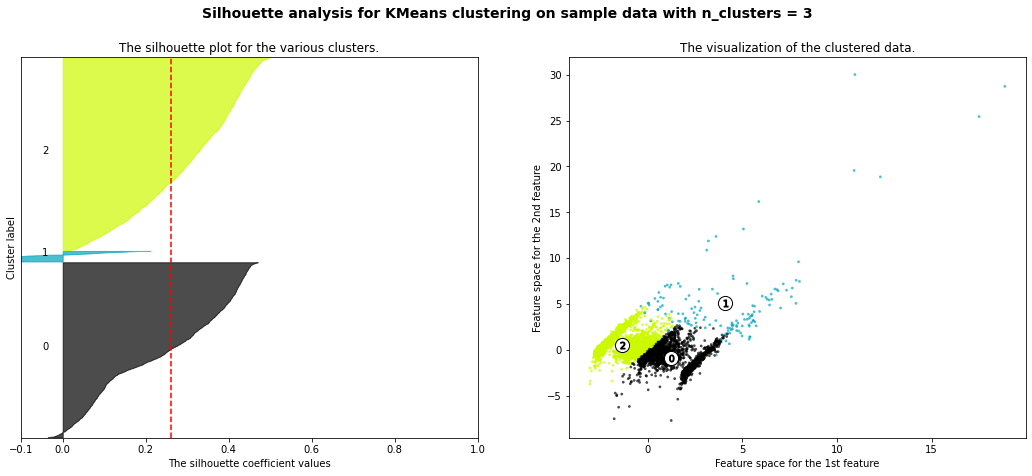

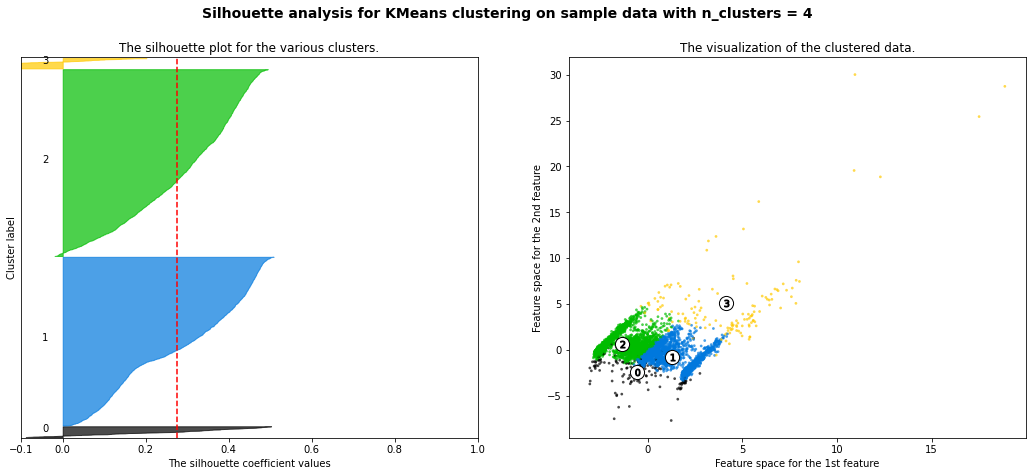

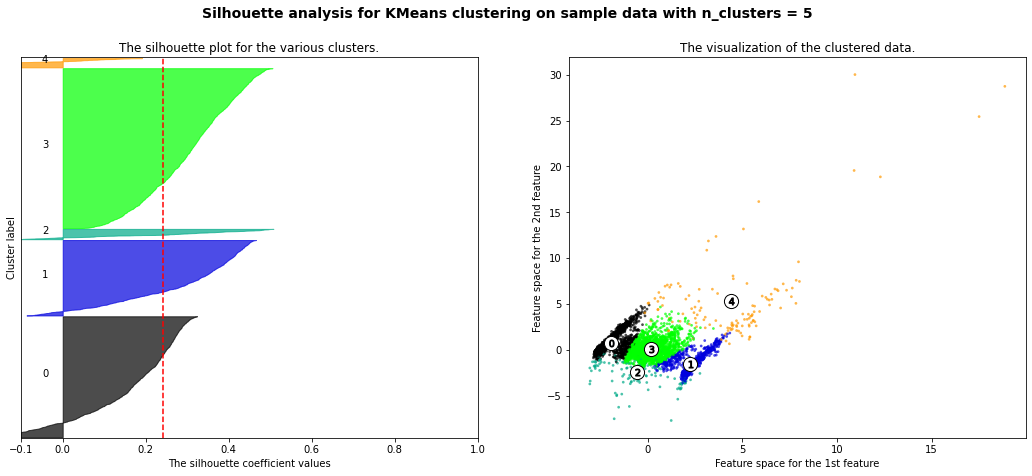

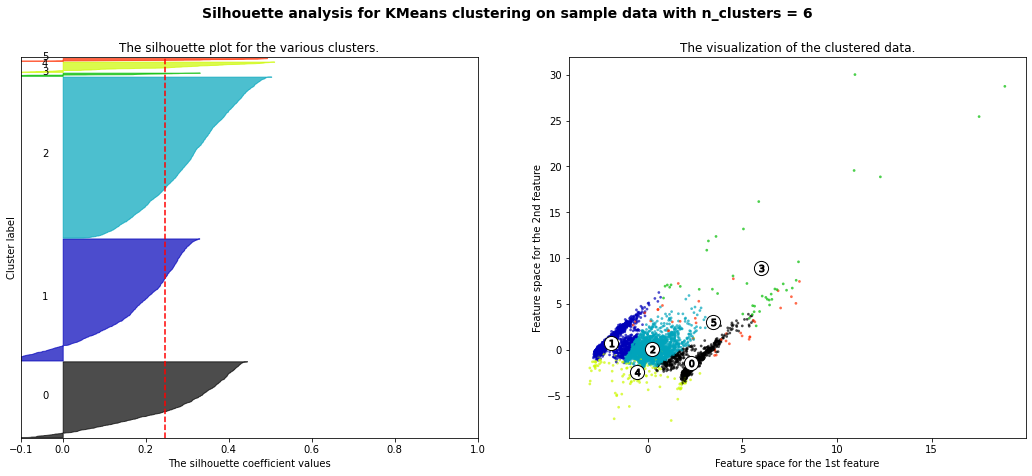

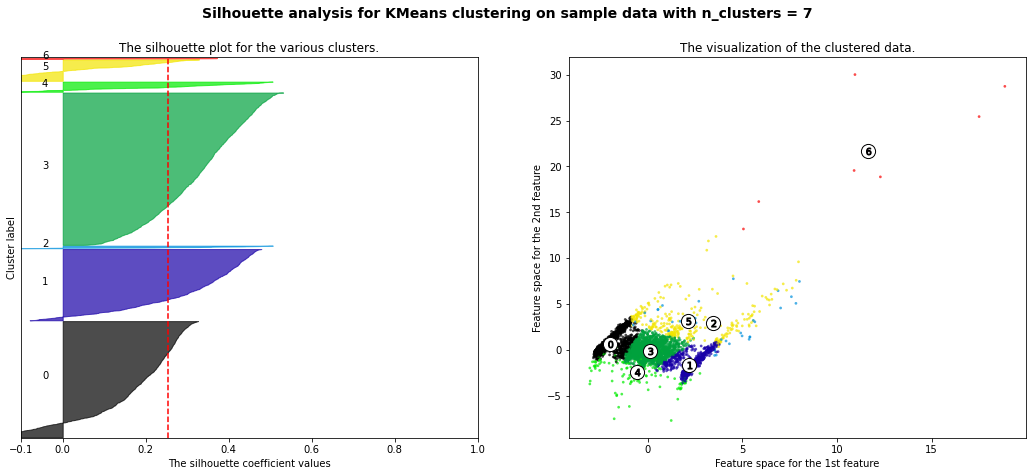

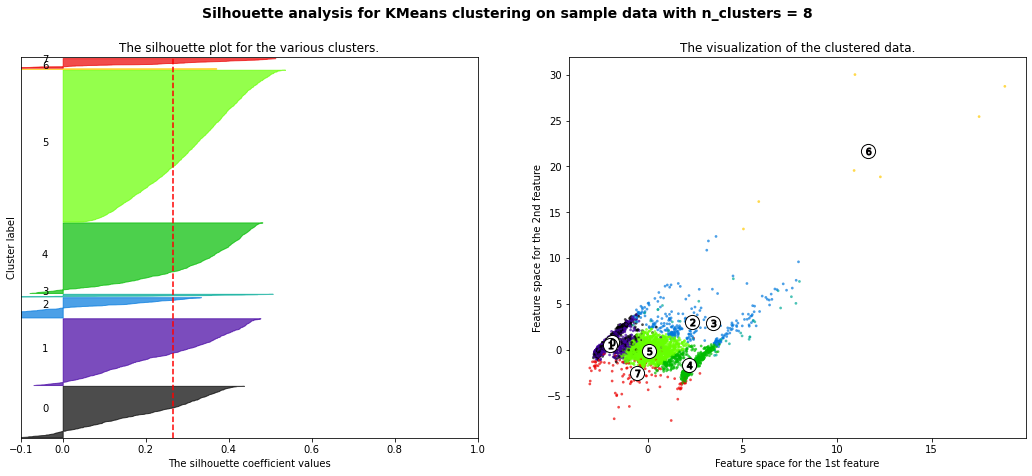

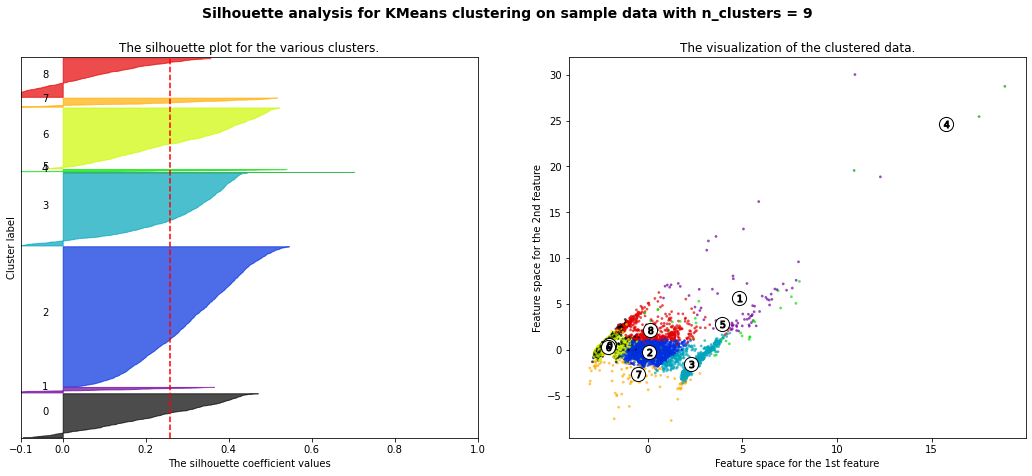

In [26]:
visualize_silhouette(max_clusters=9, X=X_reduced)

6. Instantiate a k-mean model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [27]:
km = KMeans(n_clusters=5)
km.fit(X_reduced)

KMeans(n_clusters=5)

7. What is the size of each cluster? 

In [28]:
# assign cluster assignments to a dataframe and generate counts
km.transform(X_reduced)
labels = km.labels_.tolist()
cluster_assignments = pd.DataFrame(labels, columns=['cluster'])
cluster_assignments['cluster'].value_counts()

1    3334
4    1444
0     147
2      38
3      37
Name: cluster, dtype: int64

8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [29]:
past['cluster_pca'] = labels

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

In [30]:
import seaborn as sns

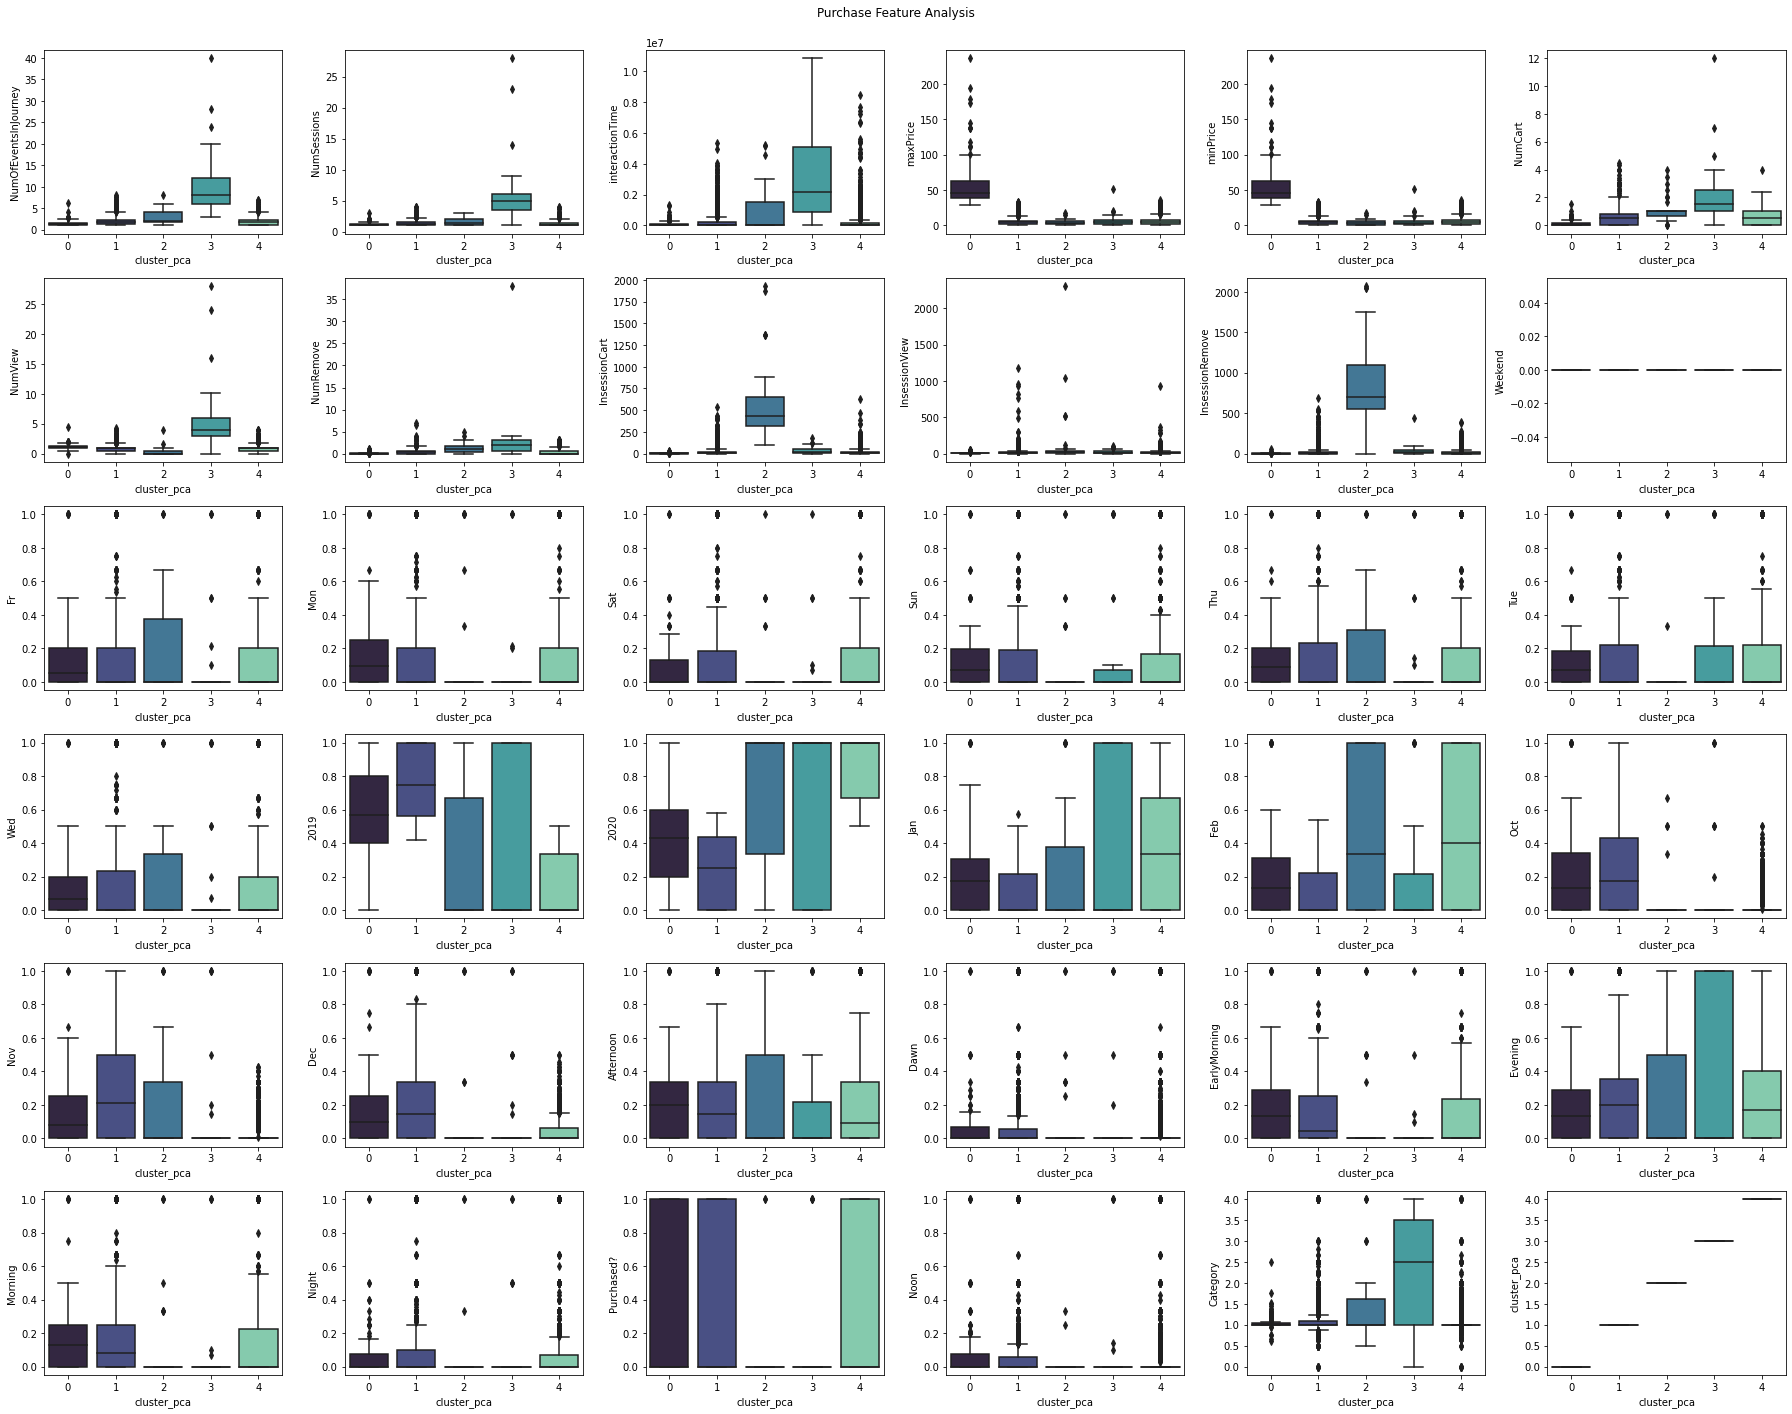

In [31]:
# create a list of columns to evaluate against the cluster
analysis_columns = list(past.columns)
analysis_columns.remove('user_id')
analysis_columns.remove('product_id')

fig = plt.figure(figsize=(25, 20))
j = 0
for i in analysis_columns:
    plt.subplot(6, 6, j+1)
    j += 1
    sns.boxplot(data=past, x='cluster_pca', y=i, palette='mako')
fig.suptitle('Purchase Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

    *YOUR ANSWER HERE*

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

- clusters 

In [32]:
# YOUR CODE HERE

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [33]:
new = pd.read_csv('../dat/new.csv.gz')

In [34]:
assert new.shape == (30091, 5)

In [35]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


In [36]:
new.shape

(30091, 5)

2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

        *YOUR ANSWER HERE*

💡 The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [37]:
import numpy as np

In [38]:
np.intersect1d(past['product_id'].values, new['product_id'].values)

array([], dtype=int64)

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [39]:
# YOUR CODE HERE # ~.344
new['Purchased?'].sum() / len(new)

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [40]:
# YOUR CODE HERE
X_test = new.drop(['Purchased?', 'product_id'], axis=1)
X_train = past[list(X_test.columns)].values
X_test = X_test.values
y_train = past['Purchased?'].values
y_test = new['Purchased?'].values

print(f'X_train has shape: {X_train.shape}')
print(f'X_test has shape: {X_test.shape}')
print(f'y_train has shape: {y_train.shape}')
print(f'y_test has shape: {y_test.shape}')

assert isinstance(X_train, np.ndarray)
assert isinstance(X_test, np.ndarray)
assert isinstance(y_train, np.ndarray)
assert isinstance(y_test, np.ndarray)

X_train has shape: (5000, 3)
X_test has shape: (30091, 3)
y_train has shape: (5000,)
y_test has shape: (30091,)


In [41]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [42]:
lr_model = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78     19732
           1       0.43      0.06      0.11     10359

    accuracy                           0.65     30091
   macro avg       0.54      0.51      0.44     30091
weighted avg       0.58      0.65      0.55     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [43]:
# YOUR CODE HERE
X = np.append(X_train, X_test, axis=0)
X.shape

(35091, 3)

In [44]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [45]:
# YOUR CODE HERE
dummy = np.negative(np.ones(len(X_test)))
y = np.append(y_train, dummy)

In [46]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [48]:
from sklearn.semi_supervised import LabelSpreading

In [49]:
# YOUR CODE HERE
label_prop_model = LabelSpreading(kernel='knn', alpha=0.01)
label_prop_model.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [52]:
semi_sup_preds = label_prop_model.transduction_[len(X_train):]
semi_sup_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [54]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.80      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.81      0.77      0.79     30091
weighted avg       0.82      0.82      0.81     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78     19732
           1       0.43      0.06      0.11     10359

    accuracy                           0.65     30091
   macro avg       0.54      0.51      0.44     30091
weighted avg       0.58      0.65      0.55     30091



    *YOUR ANSWER HERE*

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)

# Answers to Questions
#### ❓ What percentage of the interactions (rows) resulted in a purchase?
34.38 % of the interactions (rows) resulted in a purchase.

#### ❓ Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
In looking at the distribution of interaction purchases, we observe that 65.62% of interactions did not result in a purchase. This
supports the intuition that customers generally "window-shop".

#### ❓ From the classification perspective, is the data balanced?
The data is imbalanced given that we have a 65.62% of the data representing an interaction with no purchase and 34.38% of the data 
representing an interaction with a purchase.

#### ❓ Do you need to preprocess the data before performing PCA?
It is best practice to scale the data since with PCA we are attempting to select the features which explain the most variance in the data (i.e. the discrepancy between the model estimates and the actual data). Scaling the data transforms the features into units of measurement that are closer to one another and avoiding any one feature dominating the others.

#### ❓ Should you include standardization in the pipeline?
It is best practice to standardize features prior to PCA in order to scale the features to be distributed around a mean of zero with a standard deviation of one. By standardizing our data, we then make it easier to compare the covariances (i.e., the measure of how much two variables vary together) between each pair of featurs.

#### ❓ Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
When we think about what's happening with PCA dimensionality reduction, we're essentially facilitating the creation of a "simpler" model by reducing high-dimensional data into a few, principle components while retaining as much information in the feature space as possible. We would expect that a simple model to perform better in regards to overfitting, but we observe that the model performs worse than the high-dimensional data. Recall that we are attempting to predict a purchase (target variable == 1 and we have class-imblance. Since both the effect of false positives (i.e., instances where the model predicted a purchase when one would NOT have been made) and false negatives (i.e., instances where the model predicted NOT a purchase when one would have been made), we can rely on the `f1` score as a proper metric for evaluation. We might expect similar performance with a reduced feature-space, when, in fact, we see a much lower f1 performance with the reduced model.

#### ❓ Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?
From the elbow plot, we could make the argument for an optimal number of clusters from 2 to 7.

#### ❓ What are the disadvantages to using the Elbow method? 
From the elbow plot above, the clear disadvantage is that we may not be able to visualize a clear "elbow" in the plot. In the instance the dataset is very large, the compute cost for running a clustering model increases at O(n^2), making it unfeasible to use an elbow plot in those scenarios. 

#### ❓ What is the size of each cluster? 
- Cluster 1: 147 customers
- Cluster 2: 3334 customers
- Cluster 3: 38 customers
- Cluster 4: 37 customers
- Cluster 5: 1444 customers

#### ❓ Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 
Using the boxplots for each feature by clusters, we can observe the following (note that cluster-designations are stated starting at 1 instead of 0):

- Session-based
    - Cluster 4 had the highest variance across most session-based features: views, removes, in-session views, in-session carts, in-session removes; they had the most amount of activity for session-based features.

- Category-based
    - Cluster 4 had the highest variance across categories; they looked at a more diverse set of product categories than all other clusters.

- Purchase-based
    - Clusters 1, 2 and 5 had the highest purchase ratios.

#### ❓ What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach?
A few assumptions of k-means clustering are:
- K-means assumes the variance of the distribution of each feature is spherical
- K-means assumes the probability for all k clusters are the same (i.e. each cluster has roughly equal number of observations)

Given these assumptions, k-means is not a good approach for this problem. Firstly, after visualizing the clusers, we see mostly "bands" instead of spherical clusters. Secondly, the after looking at the size of each cluster, we can see that the probabilities are far from equal. Both of these points make K-means a less than optimal approach.

#### ❓ Jot down recommendations or followup steps, detailing the reasons.
After evaluating other clustering methods, we should explore clustering methods that handle our data better. A couple of approaches that might work better are Spectral Clustering or DBSCAN clustering techniques. These other approaches handle many clusters, unevern cluster size, and non-flat geometry (of data).

#### ❓ How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? And how does the feature set in the training set compare to the feature set in the test set?
Comparing the training and test sets, we see a 6-fold increase in number of observations from the training set to the test set. The feature-set in the test set is far less than the training set with only 4 features in the test set compared to 34 in the training set.

#### ❓ Are there any product ids in both the training and test datasets?
There are no product ids that appear in the training set and the test set.

#### ❓ What percentage of data points resulted in a purchase in the test set?
Approximately 34% of the datapoints resulted in a purchase.

#### ❓ Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.
Using label-spreading, we see a huge improvement in f1-score between a baseline logisitic regression classifier and the same classifier using the semi-supervised predicted labels. Our intuition tells us that since we have a similarity matrix between all points in the data, label-spreading is able to identify "communities" of similar data points: in this case purchasers. Through label-spreading we assign a purchase label to the unlabeled instances in the data by assigning the majority class from each unlabeled observation's neighbors. What this tells us is that label-propagation works well in our case due to the similarities of customer purchase behvavior on our feature-set.